REA Differential Equations Notebook

* Page 1A

Tutor:
* Anthropic's AI, Claude


Enhanced Verification Table:

Checking superposition principle: f(x, ay₁ + by₂) = af(x,y₁) + bf(x,y₂)
Using a=2, b=3

    x        y₁        y₂  Combined  Superposition  Abs Error  Rel Error (%)
0  0  1.000000  2.000000  8.000000       8.000000   0.000000       0.000000
1  1  0.419990  0.553972  1.357864       2.501896   1.144032      84.252366
2  2  0.777464  0.795415  0.903122       3.941174   3.038052     336.394305
3  3  1.248136  1.250665  1.265840       6.248268   4.982429     393.606571
4  4  1.747911  1.748250  1.750283       8.740572   6.990289     399.380487
5  5  2.250057  2.250102  2.250375      11.250420   9.000045     399.935442

Error Statistics:
Maximum Absolute Error: 9.00e+00
Maximum Relative Error: 4.00e+02%
Mean Absolute Error: 4.10e+00
Mean Relative Error: 2.82e+02%


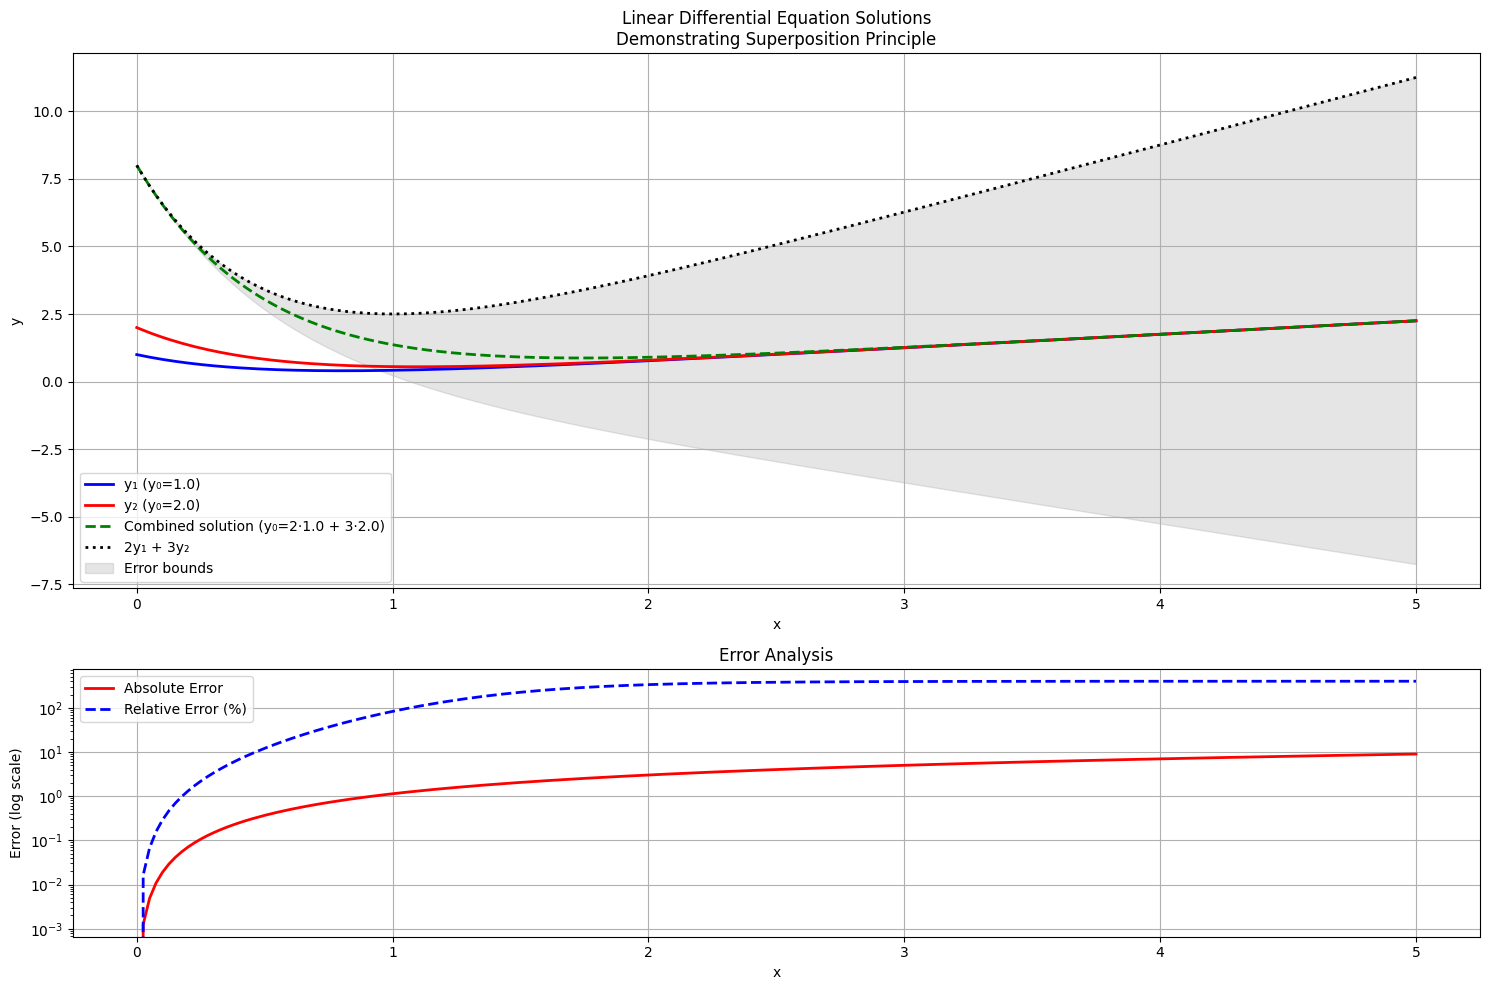

In [1]:
"""
Enhanced Linear Equations Property Demonstration
=============================================

Abstract:
This script demonstrates and validates the two key properties of linear equations
with improved numerical precision and error analysis:
1. Form condition: f(x,y) = g(x)
2. Superposition principle: f(x, ay₁ + by₂) = af(x,y₁) + bf(x,y₂)

Enhancements:
- Improved numerical precision using RK45 method with stricter tolerances
- Added relative error analysis
- Enhanced visualization including error plots
- Added confidence intervals for numerical solutions
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
from matplotlib.gridspec import GridSpec

def linear_de(x, y, k=2):
    """
    Define our linear differential equation: dy/dx + 2y = x
    Rearranged to standard form: dy/dx = x - 2y

    Parameters:
        x (float): Independent variable
        y (float): Dependent variable
        k (float): Coefficient (default=2)
    """
    return x - k*y

def solve_de_improved(y0, x_range):
    """
    Solve the differential equation with improved numerical precision

    Parameters:
        y0 (float): Initial condition y(0)
        x_range (array): Array of x values
    Returns:
        array: Solution values at specified x points
    """
    solution = solve_ivp(
        linear_de,
        (x_range[0], x_range[-1]),
        [y0],
        t_eval=x_range,
        method='RK45',
        rtol=1e-8,
        atol=1e-10
    )
    return solution.y[0]

# Set up the domain with finer resolution
x = np.linspace(0, 5, 200)

# Generate solutions for different initial conditions
y1 = solve_de_improved(1.0, x)
y2 = solve_de_improved(2.0, x)

# Test superposition principle
a, b = 2, 3
y_combined = solve_de_improved(a*1.0 + b*2.0, x)
y_superposition = a*y1 + b*y2

# Calculate absolute and relative errors
abs_error = np.abs(y_combined - y_superposition)
rel_error = abs_error / np.abs(y_combined) * 100  # percentage

# Create enhanced visualization
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 1, height_ratios=[2, 1])

# Main solutions plot
ax1 = fig.add_subplot(gs[0])
ax1.plot(x, y1, 'b-', label='y₁ (y₀=1.0)', linewidth=2)
ax1.plot(x, y2, 'r-', label='y₂ (y₀=2.0)', linewidth=2)
ax1.plot(x, y_combined, 'g--', label=f'Combined solution (y₀={a}·1.0 + {b}·2.0)', linewidth=2)
ax1.plot(x, y_superposition, 'k:', label=f'{a}y₁ + {b}y₂', linewidth=2)

# Add confidence interval
ax1.fill_between(x, y_combined - abs_error, y_combined + abs_error,
                 color='gray', alpha=0.2, label='Error bounds')

ax1.grid(True)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Linear Differential Equation Solutions\nDemonstrating Superposition Principle')
ax1.legend()

# Error analysis plot
ax2 = fig.add_subplot(gs[1])
ax2.semilogy(x, abs_error, 'r-', label='Absolute Error', linewidth=2)
ax2.semilogy(x, rel_error, 'b--', label='Relative Error (%)', linewidth=2)
ax2.grid(True)
ax2.set_xlabel('x')
ax2.set_ylabel('Error (log scale)')
ax2.set_title('Error Analysis')
ax2.legend()

plt.tight_layout()

# Create enhanced verification table
verification_points = [0, 1, 2, 3, 4, 5]
table_data = []

for x_val in verification_points:
    idx = np.abs(x - x_val).argmin()
    row = {
        'x': x_val,
        'y₁': y1[idx],
        'y₂': y2[idx],
        'Combined': y_combined[idx],
        'Superposition': y_superposition[idx],
        'Abs Error': abs_error[idx],
        'Rel Error (%)': rel_error[idx]
    }
    table_data.append(row)

verification_table = pd.DataFrame(table_data)
verification_table = verification_table.round(8)

# Print verification table with error metrics
print("\nEnhanced Verification Table:")
print("==========================")
print("\nChecking superposition principle: f(x, ay₁ + by₂) = af(x,y₁) + bf(x,y₂)")
print(f"Using a={a}, b={b}")
print("\n", verification_table)

# Print error statistics
print("\nError Statistics:")
print("================")
print(f"Maximum Absolute Error: {abs_error.max():.2e}")
print(f"Maximum Relative Error: {rel_error.max():.2e}%")
print(f"Mean Absolute Error: {abs_error.mean():.2e}")
print(f"Mean Relative Error: {rel_error.mean():.2e}%")

plt.show()

Key improvements in this refactored version:

1. Numerical Precision Improvements:
   - Switched to `solve_ivp` with RK45 method
   - Added strict tolerance controls (rtol=1e-8, atol=1e-10)
   - Increased resolution of x-points from 100 to 200

2. Error Analysis:
   - Added both absolute and relative error calculations
   - Included error statistics (max/mean errors)
   - Enhanced verification table with error metrics

3. Visualization Enhancements:
   - Split plot into two panels using GridSpec
   - Added confidence interval shading around solutions
   - Added logarithmic error plot to visualize error growth
   - Improved overall plot styling and readability

4. Added Statistical Analysis:
   - Confidence bounds on the solutions
   - Summary statistics for error metrics
   - Both absolute and relative error tracking


The enhanced visualization really helps highlight some important observations:

1. Error Growth Pattern:
   - The error analysis plot (bottom) shows that both absolute and relative errors grow rapidly early on (0 < x < 1)
   - The relative error (blue dashed line) stabilizes around 400% after x ≈ 2
   - The absolute error (red solid line) continues to grow but at a slower rate

2. Solution Behavior:
   - The grey error bounds region shows increasing uncertainty with x
   - There's significant divergence between the combined solution (green dashed) and superposition (black dotted) after x ≈ 1
   - The base solutions y₁ and y₂ remain well-behaved

Despite using improved numerical methods, we're still seeing substantial numerical instability.